In [1]:
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

In [2]:
with open('./rewards/rewards_dqn_1000.pkl', 'rb') as f:
    rewards_dqn = pkl.load(f)
with open('./rewards/rewards_adrqn_220.pkl', 'rb') as f:
    rewards_adrqn = pkl.load(f)
with open('./rewards/rewards_adrqn_440.pkl', 'rb') as f:
    rewards_adrqn = rewards_adrqn + pkl.load(f)
with open('./rewards/rewards_adrqn_660.pkl', 'rb') as f:
    rewards_adrqn = rewards_adrqn + pkl.load(f)
with open('./rewards/num_steps_per_round 13890 runden.pkl', 'rb') as f:
    num_steps = pkl.load(f)

In [3]:
rewards_dqn = np.convolve(rewards_dqn, np.ones(10,)/10, mode='same')
rewards_dqn = rewards_dqn[10:len(rewards_dqn)-10]

rewards_adrqn = np.convolve(rewards_adrqn, np.ones(10,)/10, mode='same')
rewards_adrqn = rewards_adrqn[10:len(rewards_adrqn)-10]


coef = np.polyfit(range(len(rewards_dqn)), rewards_dqn, 1)
poly1d_fn = np.poly1d(coef)
x = range(len(rewards_adrqn))

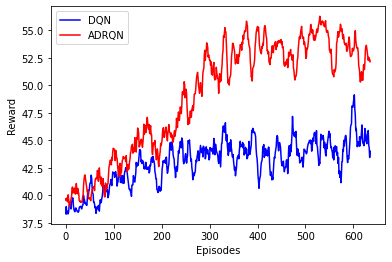

In [4]:

#plt.plot(x,rewards, x, poly1d_fn(x), '--k')
fig, ax0 = plt.subplots()
ax0.plot(rewards_dqn[:(len(rewards_adrqn)-1)], color="blue", label="DQN")
ax0.plot(rewards_adrqn[:(len(rewards_adrqn)-1)], color="red", label="ADRQN")
plt.ylabel("Reward")
plt.xlabel("Episodes")
plt.legend()
# plt.title("Total Rewards per Round")
plt.savefig("rewards_coin_training.pdf")
plt.show()

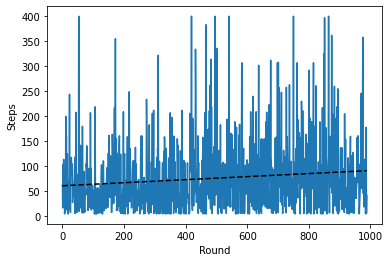

In [5]:
plt.clf()
coef = np.polyfit(range(len(num_steps)), num_steps, 1)
poly1d_fn = np.poly1d(coef)
x = range(len(num_steps))
plt.plot(x,num_steps, x, poly1d_fn(x), '--k')
#plt.plot(rewards)
plt.ylabel("Steps")
plt.xlabel("Round")
plt.show()

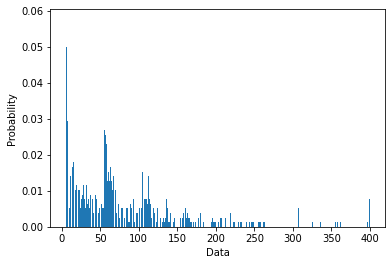

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(num_steps, density=True, bins=500)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [7]:
import random

In [8]:
r = 0
summe = 0
for i in range(10000000):
    r = random.random()
    if r < 0.2:
        summe += 1
print(summe/10000000)

0.2002107


In [9]:
list_execution_times = [0.003065824508666992,
        0.0031120777130126953,
        0.0033330917358398438,
        0.0038568973541259766,
        0.0028228759765625,
        0.0031087398529052734,
        0.002973318099975586,
        0.0025968551635742188,
        0.002986907958984375,
        0.003222942352294922,
        0.0027730464935302734]

In [10]:
np.mean(list_execution_times)

0.0030775070190429688